In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"Student_performance_data.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [4]:
x = df[['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']]
y = df['GradeClass']

In [5]:
x.shape

(2392, 14)

In [6]:
y.shape

(2392,)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
model = DecisionTreeClassifier()

In [9]:
param_grid ={   'criterion':['gini','entropy'],
                'max_depth' : [2,3,None],
                'min_samples_leaf' : range(1,20,3),
            }

In [10]:
grid_search = GridSearchCV(estimator = model,param_grid = param_grid, n_jobs = -1, cv = 5, verbose=1)

In [11]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, None],
                         'min_samples_leaf': range(1, 20, 3)},
             verbose=1)

In [12]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 13}

In [13]:
grid_search.best_score_

0.9336884440075073

In [14]:
best_model = grid_search.best_estimator_

In [15]:
yhat = best_model.predict(x_test)

In [16]:
cm = confusion_matrix(y_test,yhat)
print(cm)

[[ 20   5   4   4   0]
 [  2  73   1   2   2]
 [  1   6 108   3   3]
 [  0   6   4 112   5]
 [  0   7   0   2 348]]


In [17]:
cr = classification_report(y_test,yhat)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.61      0.71        33
         1.0       0.75      0.91      0.82        80
         2.0       0.92      0.89      0.91       121
         3.0       0.91      0.88      0.90       127
         4.0       0.97      0.97      0.97       357

    accuracy                           0.92       718
   macro avg       0.89      0.85      0.86       718
weighted avg       0.92      0.92      0.92       718



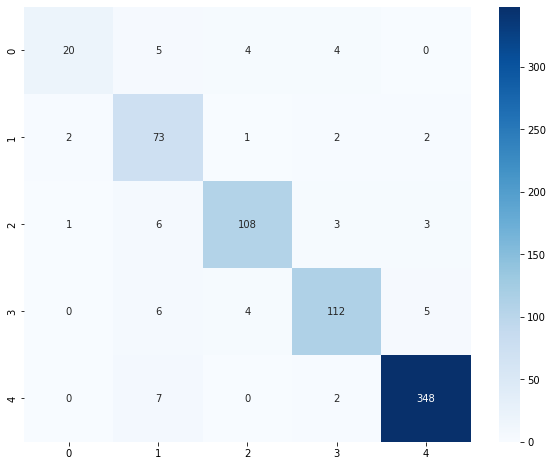

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot = True,fmt='d', cmap='Blues')
plt.show()

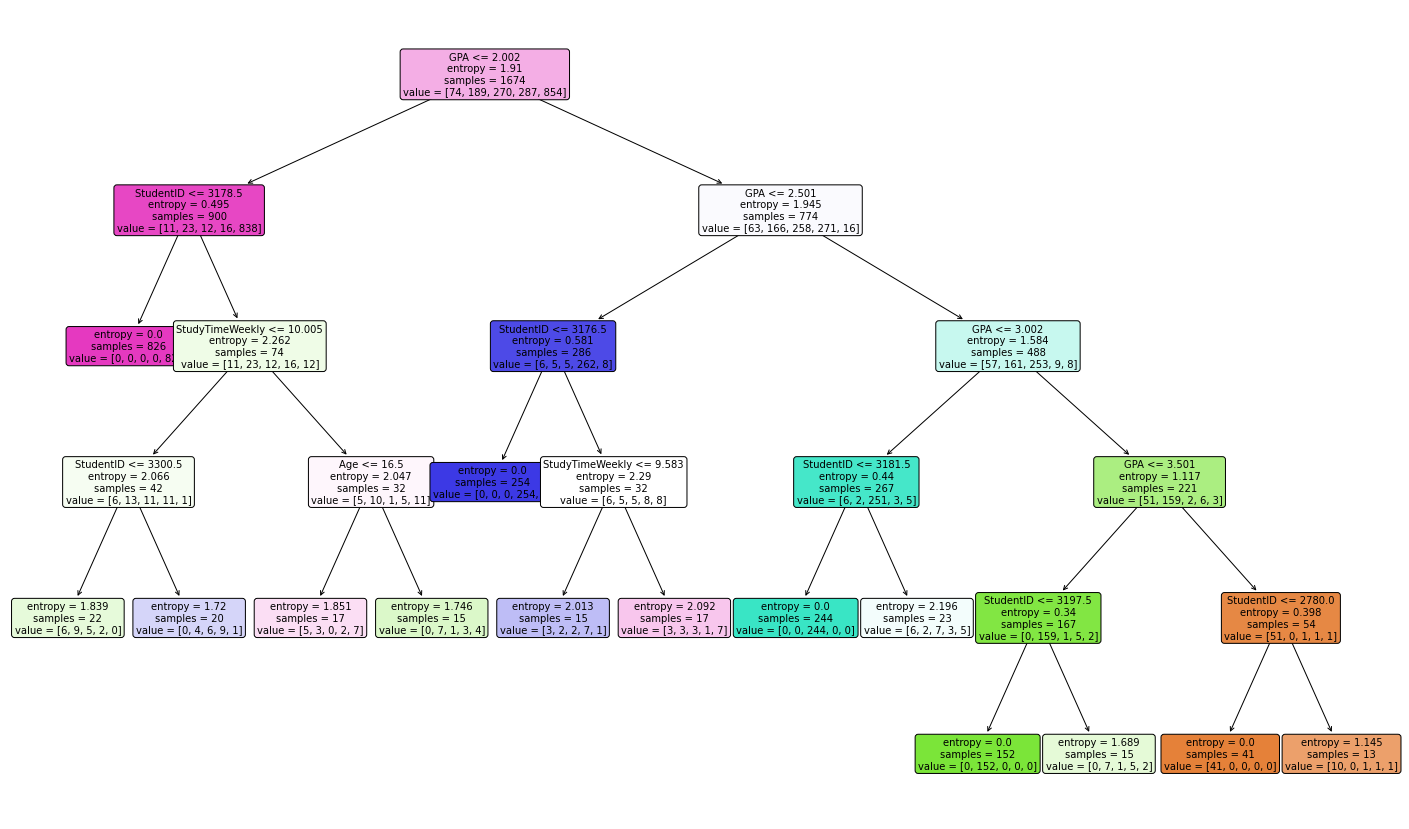

In [30]:
plt.figure(figsize=(25,15))
plot_tree(best_model, filled=True, rounded=True,
          feature_names= [ 'StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
                           'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
                           'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA'
                         ],
          fontsize=10)
plt.show()